# MLJar Implementation on House_price_regression data

In [ ]:
#!pip install mljar-supervised

In [6]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from supervised.automl import AutoML
import sklearn

import warnings
warnings.filterwarnings('ignore')

In [7]:
from sklearn.datasets import load_boston
boston_data= load_boston()


dir(boston_data)

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'target']

In [8]:
data = datasets.load_boston()
X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.Series(data["target"], name="target")

In [9]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [10]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: target, Length: 506, dtype: float64

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=20)

In [13]:
automl = AutoML(total_time_limit=60*60) # 1 hour

automl.fit(X_train, y_train)

AutoML directory: AutoML_1
The task is regression with evaluation metric rmse
AutoML will use algorithms: ['Baseline', 'Linear', 'Decision Tree', 'Random Forest', 'Xgboost', 'Neural Network']
AutoML will ensemble available models
AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble']
* Step simple_algorithms will try to check up to 3 models
1_Baseline rmse 9.017112 trained in 0.32 seconds
2_DecisionTree rmse 4.514183 trained in 13.05 seconds
3_Linear rmse 5.414753 trained in 2.01 seconds
* Step default_algorithms will try to check up to 3 models
4_Default_Xgboost rmse 2.764025 trained in 3.63 seconds
5_Default_NeuralNetwork rmse 2.770843 trained in 0.53 seconds
6_Default_RandomForest rmse 3.138667 trained in 2.62 seconds
* Step ensemble will try to check up to 1 model
Ensemble rmse 2.494825 trained in 0.25 seconds
AutoML fit time: 28.63 seconds
AutoML best model: Ensemble


AutoML()

In [14]:
pred = automl.predict_all(X_test)

In [15]:
pred.head()

,prediction
0,21.089550
1,22.673995
2,20.111250
3,20.664902
4,13.099152


Text(0, 0.5, 'Predicted value')

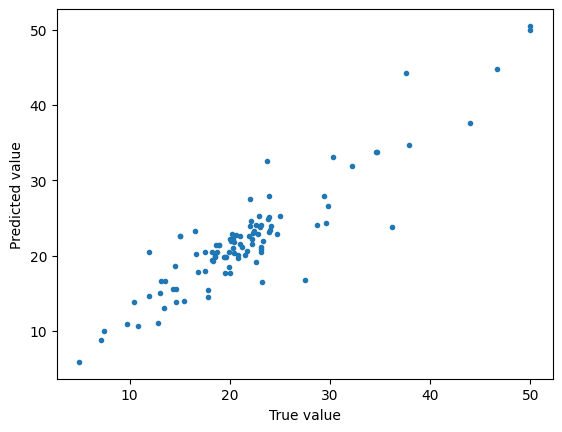

In [16]:
plt.plot(y_test, pred.prediction, '.')
plt.xlabel("True value")
plt.ylabel("Predicted value")

In [17]:
# Mean Absolute Error on test data
np.mean(np.abs(y_test-pred.prediction))

4.684309994335167